## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

<img src="example.png" alt="Pizza-1" style="width: 800px;"/>



Fig : Bishop, Pattern Recognition and ML

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import cv2

In [4]:
im =  cv2.imread(r"C:\Users\Dibakar Chaudhary\Desktop\Electro\Jamie_Before.jpg") #Reads an image into BGR Format

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)


(1024, 733, 3)


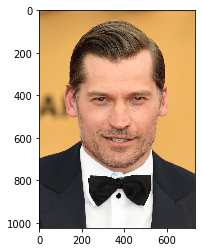

In [5]:
plt.imshow(im) # as RGB Format
plt.show()

In [6]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(750592, 3)


In [7]:
from sklearn.cluster import KMeans

In [8]:
dominant_colors = 4

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
centers = km.cluster_centers_

In [10]:
centers = np.array(centers,dtype='uint8')

In [22]:
print(centers)
ik=centers[1]

[[164 116  85]
 [ 45  40  40]
 [239 241 239]
 [232 174 111]]


### Plot what all colors are these ?

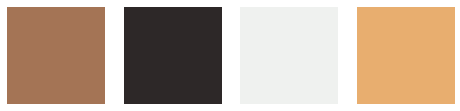

In [12]:
i = 1

plt.figure(0,figsize=(8,2))


colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()


## Segmenting Our Original Image

In [17]:
new_img = np.zeros((1024*733,3),dtype='uint8')

print(new_img.shape)


(750592, 3)


In [18]:
colors

[array([164, 116,  85], dtype=uint8),
 array([45, 40, 40], dtype=uint8),
 array([239, 241, 239], dtype=uint8),
 array([232, 174, 111], dtype=uint8)]

In [19]:
km.labels_

array([0, 0, 0, ..., 1, 1, 1])

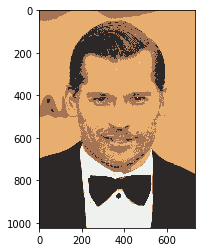

In [20]:

for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()
    
    
